# 1. Parameters

In [1]:
simulation_dir <- "simulations"

simulation_dirs <- list.files(pattern='^(cov|alpha)', simulation_dir)

# Remove this case since it failed to build trees
simulation_dirs <- simulation_dirs[sapply(simulation_dirs, function(x){x != 'alpha-10-cov-30'})]

simulation_paths <- sapply(simulation_dirs, function(x){file.path(simulation_dir, x)})
simulation_read_trees <- sapply(simulation_paths, function(x){file.path(x, "index-reads", "reads.tre")})
simulation_assembly_trees <- sapply(simulation_paths, function(x){file.path(x, "index-assemblies", "assemblies.tre")})

names(simulation_read_trees) <- simulation_dirs
names(simulation_assembly_trees) <- simulation_dirs

initial_tree_file <- "input/salmonella.tre"
trees_table_file <- file.path(simulation_dir, "tree-comparisons.tsv")

In [2]:
simulation_read_trees

alpha-0.5-cov-30 
"simulations/alpha-0.5-cov-30/index-reads/reads.tre" 
                                    alpha-1.0-cov-30 
"simulations/alpha-1.0-cov-30/index-reads/reads.tre" 
                                    alpha-2.0-cov-30 
"simulations/alpha-2.0-cov-30/index-reads/reads.tre" 
                                    alpha-5.0-cov-30 
"simulations/alpha-5.0-cov-30/index-reads/reads.tre" 
                                              cov-10 
          "simulations/cov-10/index-reads/reads.tre" 
                                              cov-20 
          "simulations/cov-20/index-reads/reads.tre" 
                                              cov-30 
          "simulations/cov-30/index-reads/reads.tre" 
                                              cov-40 
          "simulations/cov-40/index-reads/reads.tre" 
                                               cov-5 
           "simulations/cov-5/index-reads/reads.tre" 
                                              cov-50 
          "simulations/cov-50/index-reads/reads.tre"

# 2. Compare trees

## 2.1. Load trees

In [3]:
library(ape)

read_and_root_tree <- function(file, keep.multi) {
    tree <- ape::read.tree(file=file, keep.multi=keep.multi)
    tree <- ape::root(tree, "reference", resolve.root=TRUE)
    
    return(tree)
}

t_orig <- read_and_root_tree(file=initial_tree_file, keep.multi=FALSE)

t_reads <- lapply(simulation_read_trees, function(x){read_and_root_tree(file=x, keep.multi=TRUE)})
t_reads <- do.call(c, unlist(t_reads, recursive=FALSE))
t_assemblies <- lapply(simulation_assembly_trees, function(x){read_and_root_tree(file=x, keep.multi=TRUE)})
t_assemblies <- do.call(c, unlist(t_assemblies, recursive=FALSE))

## 2.2. Distances between trees

In [4]:
library(treespace)

reference_other_distances <- function(reference_tree, other_trees, dist_func) {
    distances <- c()
    labels <- names(other_trees)
    for(label in labels) {
        tree <- other_trees[[label]]
        distance <- dist_func(reference_tree, tree, normalize=TRUE, rooted=TRUE)
        distances <- c(distances, distance)
    }
    
    return(distances)
}

tree_distances_reference <- function(reference_tree, read_trees, assembly_trees) {
    types <- c(rep("reads", each=length(read_trees)), rep("assembly", each=length(assembly_trees)))
    labels <- c(names(read_trees), names(assembly_trees))
    lambda <- 0.5
    distances = c(treespace::refTreeDist(reference_tree, read_trees, lambda=lambda),
                 treespace::refTreeDist(reference_tree, assembly_trees, lambda=lambda))
    
    rfn_distance_reads <- reference_other_distances(t_orig, read_trees, phangorn::RF.dist)
    rfn_distance_assemblies <- reference_other_distances(t_orig, assembly_trees, phangorn::RF.dist)
    rfn_distances <- c(rfn_distance_reads, rfn_distance_assemblies)
    
    wrfn_distance_reads <- reference_other_distances(t_orig, read_trees, phangorn::wRF.dist)
    wrfn_distance_assemblies <- reference_other_distances(t_orig, assembly_trees, phangorn::wRF.dist)
    wrfn_distances <- c(rfn_distance_reads, rfn_distance_assemblies)
    
    df <- data.frame(
               Type = types,
               Simulation = labels,
               RFN_Distance = rfn_distances,
               wRFN_Distance = wrfn_distances,
               KC_Distance = distances)
    
    return(df)
}

tree_distances_df <- tree_distances_reference(t_orig, t_reads, t_assemblies)
# tree_distances_df["Coverage"] <- as.numeric(tree_distances_df$Coverage)
tree_distances_df

Loading required package: ade4

code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpExtent” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPoly” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolyPart” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_SpPolygons” was not checked for suspicious field assignments (recommended package ‘codetoo

Type,Simulation,RFN_Distance,wRFN_Distance,KC_Distance
<chr>,<chr>,<dbl>,<dbl>,<dbl>
reads,alpha-0.5-cov-30,0.7241379,0.7241379,82.28627
reads,alpha-1.0-cov-30,0.7413793,0.7413793,86.40740
reads,alpha-2.0-cov-30,0.7586207,0.7586207,71.60713
reads,alpha-5.0-cov-30,0.7413793,0.7413793,85.31720
reads,cov-10,0.7931034,0.7931034,79.86547
reads,cov-20,0.7413793,0.7413793,83.07946
reads,cov-30,0.7413793,0.7413793,72.87955
reads,cov-40,0.7413793,0.7413793,92.04510
reads,cov-5,0.9827586,0.9827586,144.96241


In [5]:
write.table(tree_distances_df, trees_table_file, append = FALSE, sep = "\t", dec = ".",
            row.names = FALSE, col.names = TRUE)

# 3. Visualize trees

## 3.1. Reads

In [6]:
names(t_reads)

[1] "alpha-0.5-cov-30" "alpha-1.0-cov-30" "alpha-2.0-cov-30" "alpha-5.0-cov-30"
 [5] "cov-10"           "cov-20"           "cov-30"           "cov-40"          
 [9] "cov-5"            "cov-50"

### 3.1.1. Tranition rate=1.0

Loading required package: maps



Rotating nodes to optimize matching...
Done.


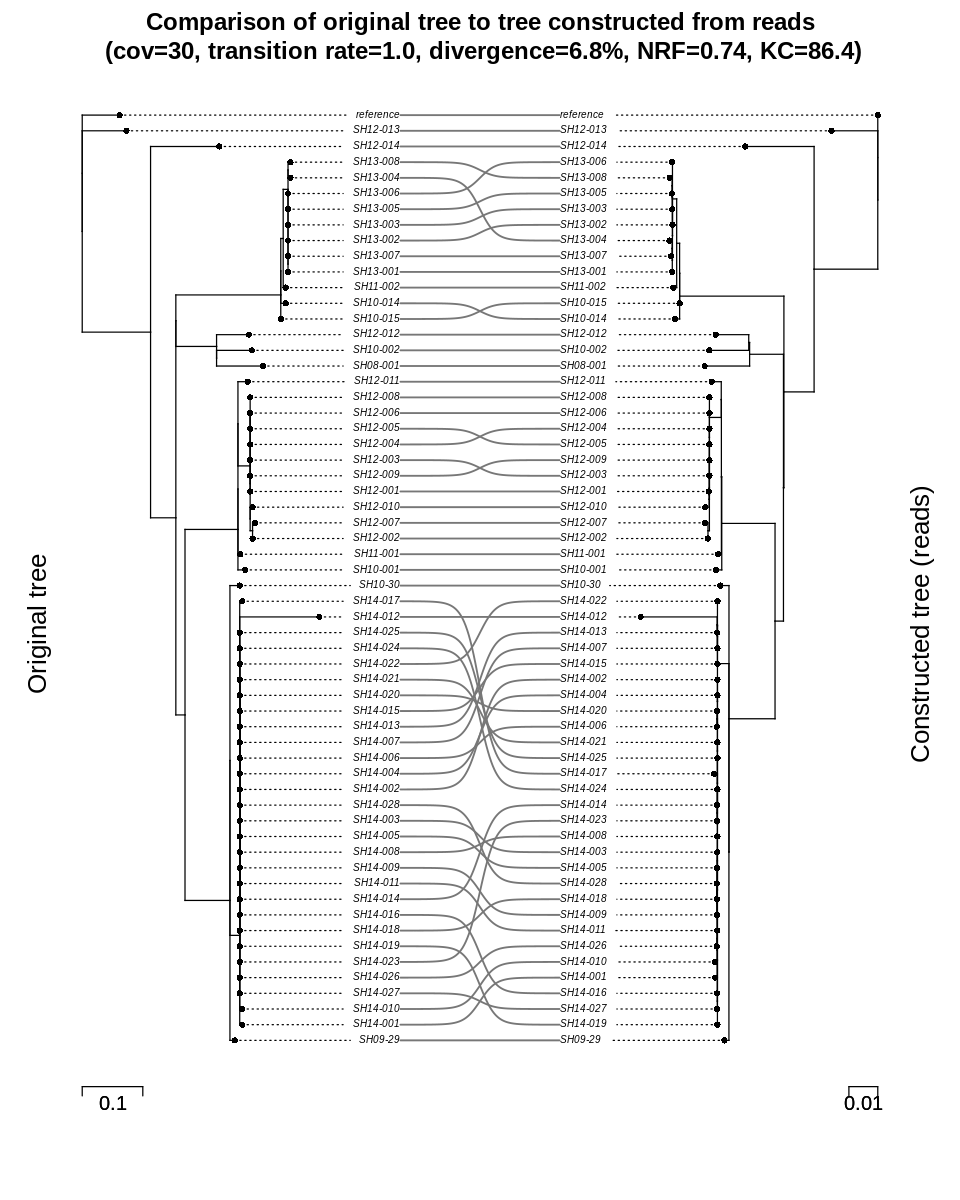

In [7]:
library(phytools)

plot_tree <- function(simulation, label, data_type, trees_array, file) {
    rfn_distance <- tree_distances_df[tree_distances_df["Simulation"] == simulation & tree_distances_df["Type"] == data_type, "RFN_Distance"]
    kc_distance <- tree_distances_df[tree_distances_df["Simulation"] == simulation & tree_distances_df["Type"] == data_type, "KC_Distance"]
    
    if (!is.null(file)) {
        pdf(file = file)
    }
    
    options(repr.plot.width=8, repr.plot.height=10)
    par(mar = c(1,1,5,1), oma=c(1,2,3,2))
    plot(phytools::cophylo(t_orig, trees_array[[simulation]], rotate=TRUE),
         fsize=0.5, scale.bar=c(0.1,0.01),
         link.type="curved", link.col="#777777", link.lwd=1.5, link.lty=1)
    title(main=sprintf("Comparison of original tree to tree constructed from %s\n (%s, NRF=%0.2f, KC=%0.1f)",
                       data_type, label, rfn_distance, kc_distance), outer=TRUE)
    mtext("Original tree", side=2, cex=1.3)
    mtext(sprintf("Constructed tree (%s)", data_type), side=4, cex=1.3)
}

plot_tree(simulation="alpha-1.0-cov-30", label=sprintf("cov=30, transition rate=1.0, divergence=6.8%%"),
          data_type="reads", trees_array=t_reads,
          file=NULL)

In [8]:
plot_tree(simulation="alpha-1.0-cov-30", label=sprintf("cov=30, transition rate=1.0, divergence=6.8%%"),
          data_type="reads", trees_array=t_reads,
          file="figures/original-reads-tree-cov-30-alpha-1.0.pdf")
dev.off()

Rotating nodes to optimize matching...
Done.


png 
  2

### 3.1.2. Tranition rate=2.0

Rotating nodes to optimize matching...
Done.


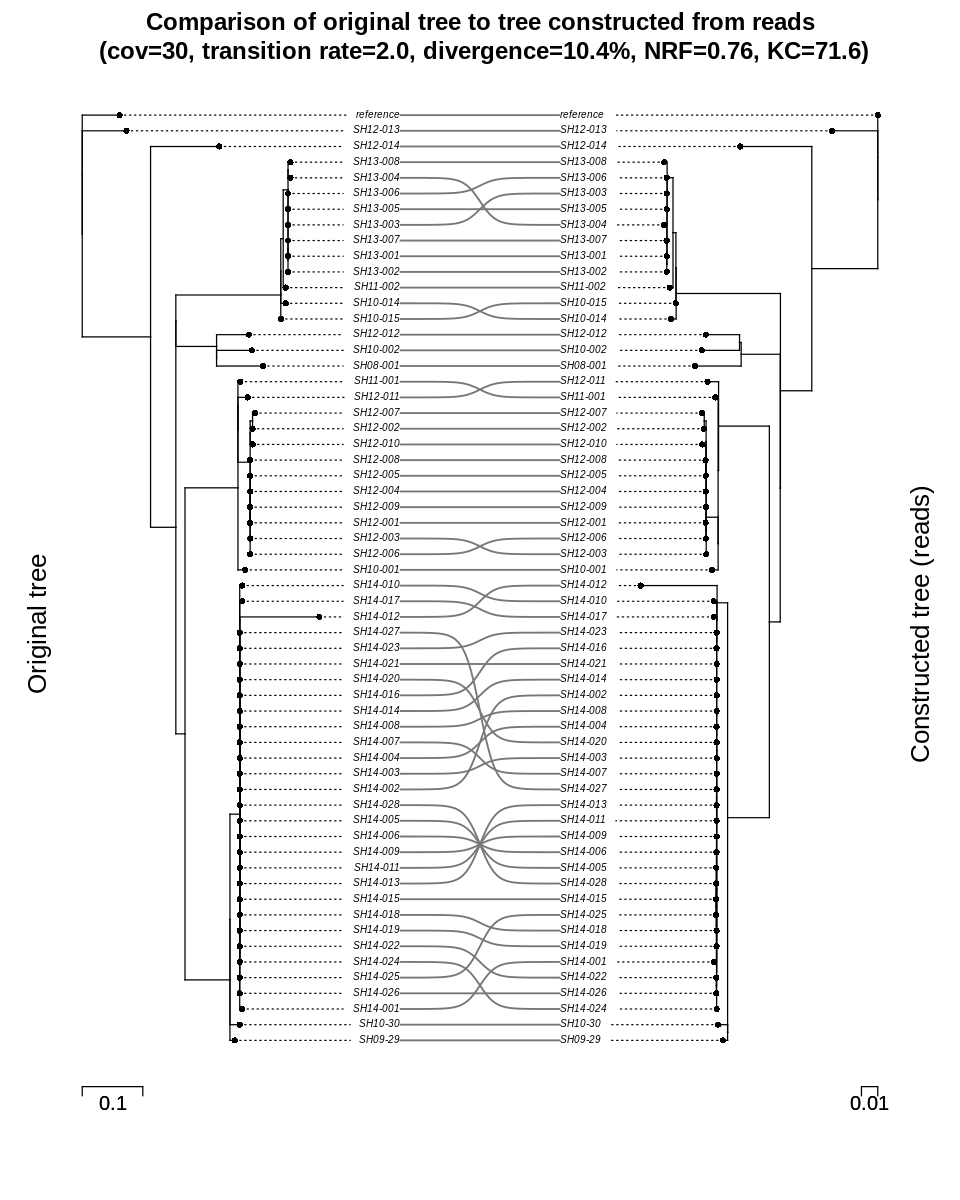

In [9]:
plot_tree(simulation="alpha-2.0-cov-30", label=sprintf("cov=30, transition rate=2.0, divergence=10.4%%"),
          data_type="reads", trees_array=t_reads,
          file=NULL)

In [10]:
plot_tree(simulation="alpha-2.0-cov-30", label=sprintf("cov=30, transition rate=2.0, divergence=10.4%%"),
          data_type="reads", trees_array=t_reads,
          file="figures/original-reads-tree-cov-30-alpha-2.0.pdf")

Rotating nodes to optimize matching...
Done.


## 3.2. Assemblies

### 3.2.1. Transition rate=1.0

Rotating nodes to optimize matching...
Done.


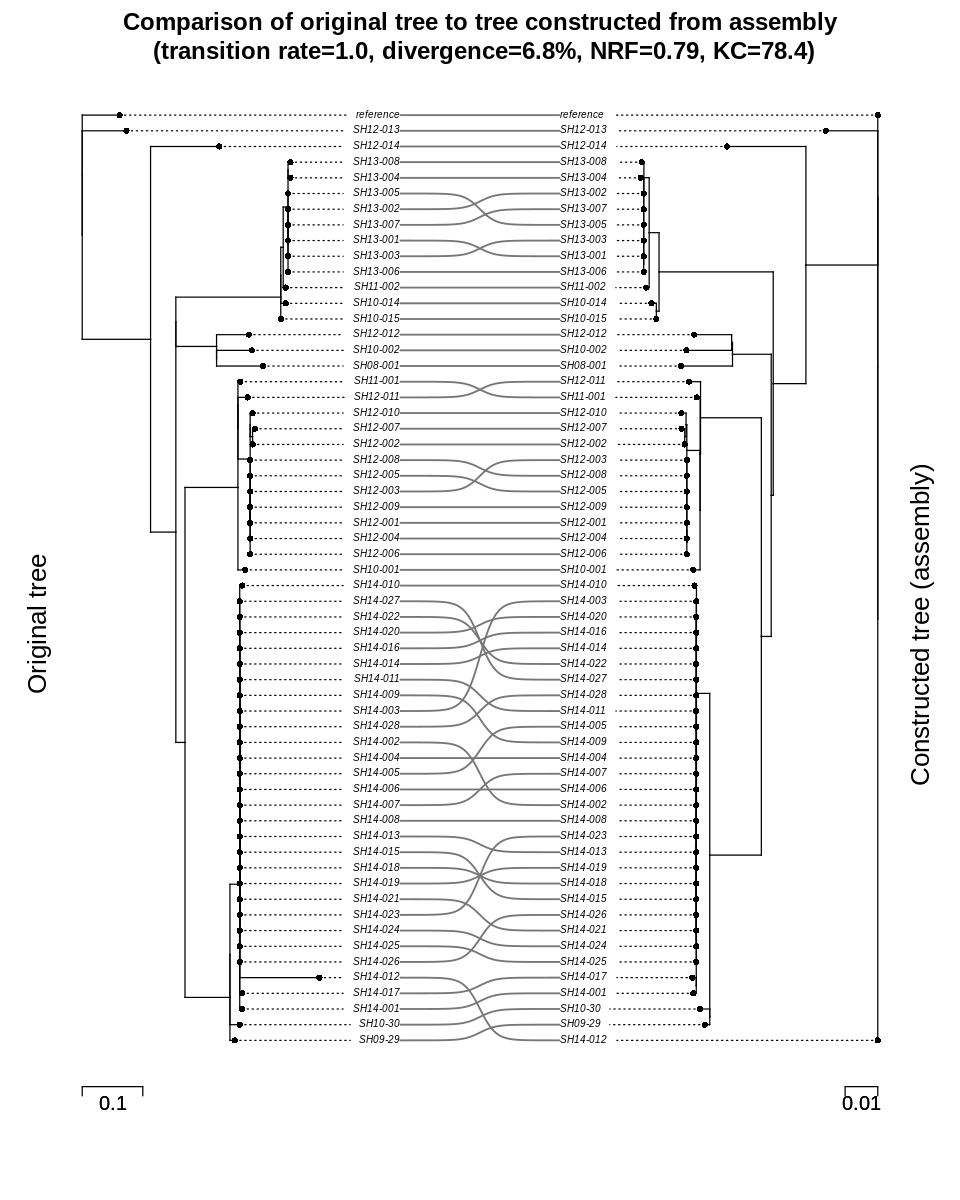

In [11]:
plot_tree(simulation="alpha-1.0-cov-30", label=sprintf("transition rate=1.0, divergence=6.8%%"),
          data_type="assembly", trees_array=t_assemblies,
          file=NULL)

In [12]:
plot_tree(simulation="alpha-1.0-cov-30", label=sprintf("transition rate=1.0, divergence=6.8%%"),
          data_type="assembly", trees_array=t_assemblies,
          file="figures/original-assemblies-tree-alpha-1.0.pdf")
dev.off()

Rotating nodes to optimize matching...
Done.


png 
  2

### 3.2.2. Transition rate=2.0

Rotating nodes to optimize matching...
Done.


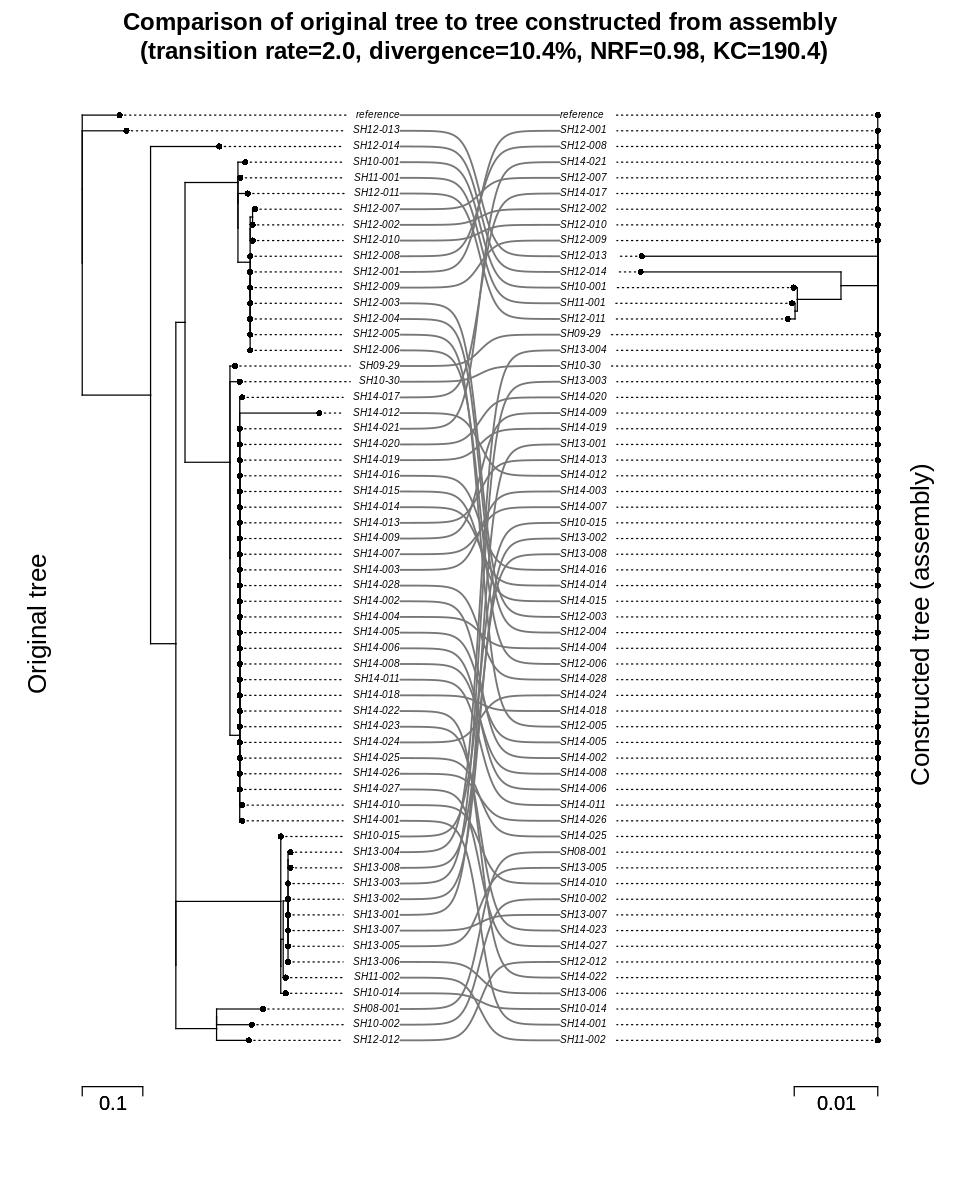

In [13]:
plot_tree(simulation="alpha-2.0-cov-30", label=sprintf("transition rate=2.0, divergence=10.4%%"),
          data_type="assembly", trees_array=t_assemblies,
          file=NULL)

In [14]:
plot_tree(simulation="alpha-2.0-cov-30", label=sprintf("transition rate=2.0, divergence=10.4%%"),
          data_type="assembly", trees_array=t_assemblies,
          file="figures/original-assemblies-tree-alpha-2.0.pdf")
dev.off()

Rotating nodes to optimize matching...
Done.


png 
  2